<h1>Introduction </h1>

"Past performance does not guarantee success" - so goes obligatory disclaimer of financial asset management firms.
This may be valid when it comes to wealth management, but how valid is it to the world's favourite game?

There are numerous examples of players having excellent seasons or promising early careers but failing to live up to the hype. Conversely, some players do not perform well and go on to have brilliant seasons.  Overall, it is very rare to see footballers scoring the same amount of goals each season.  Some variation will exist and this notebook will attempt to quantify how much.

After the results are produced, some investigation into the causes of variation may take place.  If possible, some effort may be made to control for injuries, club changes and footballers aging.  The author has a hypotheses that luck/randomness plays a very large role in this and the notebook may falsify this by showing predictability based on past data.

<h1>To do list</h1>

Setting up [x]
<br>import everthing to an register [x]
<br>limit to only relevant columns [x]
<br>change column names to include year [x]
<br>combine into one df [x]
<br>make sure names with strange characters combine properly []
<br>accomodate club changes []
<br>limit to only players that have a good sample size of goals/seasons []
<br>correlation between each year [x]
<br>look at change vs last year []
<br>see if there are trend correlations []
<br>control for age [x] loop through each df_list entry, produce a table, outer join with main list
<br> do assissts correlate with goals? [x]
<br> do years -2 and -3 produce better results than year 1 [ ]

<h1>Preparing data</h1>

In [33]:
#### Setting Up

import pandas as pd
import numpy as np

In [34]:
### Importing the data
### I use easy names to avoid having to type too much

dfPL19 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2019-to-2020-stats.csv")
dfPL18 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2018-to-2019-stats.csv")
dfPL17 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2017-to-2018-stats.csv")
dfPL16 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2016-to-2017-stats.csv")
dfPL15 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2015-to-2016-stats.csv")
dfPL14 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2014-to-2015-stats.csv")
dfPL13 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2013-to-2014-stats.csv")
dfPL12 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2012-to-2013-stats.csv")
dfPL11 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2011-to-2012-stats.csv")
dfPL10 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2010-to-2011-stats.csv")
dfPL09 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2009-to-2010-stats.csv")
dfPL08 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2008-to-2009-stats.csv")
dfPL07 = pd.read_csv("C:/Users/dariu/Desktop/Kaggle/Football/Footy Stats/Premier_League_Data/england-premier-league-players-2007-to-2008-stats.csv")

df_list = []

#### i'd like to know how to automate this....
####for i in range (19,10,-1):
    ####df_list.append(dfPL{i})
    
df_list=[dfPL19,dfPL18,dfPL17,dfPL16,dfPL15,dfPL14,dfPL13,dfPL12,dfPL11,dfPL10,dfPL09,dfPL08,dfPL07]

dfPL19.columns

Index(['full_name', 'age', 'birthday', 'league', 'season', 'position',
       'Current Club', 'minutes_played_overall', 'minutes_played_home',
       'minutes_played_away', 'nationality', 'appearances_overall',
       'appearances_home', 'appearances_away', 'goals_overall', 'goals_home',
       'goals_away', 'assists_overall', 'assists_home', 'assists_away',
       'penalty_goals', 'penalty_misses', 'clean_sheets_overall',
       'clean_sheets_home', 'clean_sheets_away', 'conceded_overall',
       'conceded_home', 'conceded_away', 'yellow_cards_overall',
       'red_cards_overall', 'goals_involved_per_90_overall',
       'assists_per_90_overall', 'goals_per_90_overall', 'goals_per_90_home',
       'goals_per_90_away', 'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
       'rank_in

In [35]:
#### Limiting to only relevant columns

relevant_col = ["full_name","age","season","position","Current Club","minutes_played_overall","minutes_played_home","minutes_played_away",
"appearances_overall","appearances_home","appearances_away","goals_overall","goals_home","goals_away","assists_overall","assists_home","assists_away","penalty_goals","penalty_misses",
"goals_involved_per_90_overall","assists_per_90_overall","goals_per_90_overall","goals_per_90_home","goals_per_90_away"
]

for i in range(len(df_list)):
    df_list[i]=df_list[i][relevant_col]



In [36]:
###Making a spare df_list
df_list2=[dfPL19,dfPL18,dfPL17,dfPL16,dfPL15,dfPL14,dfPL13,dfPL12,dfPL11,dfPL10,dfPL09,dfPL08,dfPL07]
relevant_col = ["full_name","age","season","position","Current Club","minutes_played_overall","minutes_played_home","minutes_played_away",
"appearances_overall","appearances_home","appearances_away","goals_overall","goals_home","goals_away","assists_overall","assists_home","assists_away","penalty_goals","penalty_misses",
"goals_involved_per_90_overall","assists_per_90_overall","goals_per_90_overall","goals_per_90_home","goals_per_90_away"
]

for i in range(len(df_list)):
    df_list2[i]=df_list2[i][relevant_col]

In [37]:
#### Function for renaming columnns so that they specify season

def col_edit_date(df,column,season):
    df.rename(columns = {column:column+" "+season}, inplace = True) 

In [38]:
### Iterating through each column for each data frame in my list

for i in range(len(df_list)):
        season = df_list[i].at[0,"season"]
        col_num=(len(df_list[i].columns))
        for x in range(1,col_num):
            col_edit_date(df_list[i],df_list[i].columns[x],season)


C:\Users\dariu\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df_list[0].columns

Index(['full_name', 'age 2019/2020', 'season 2019/2020', 'position 2019/2020',
       'Current Club 2019/2020', 'minutes_played_overall 2019/2020',
       'minutes_played_home 2019/2020', 'minutes_played_away 2019/2020',
       'appearances_overall 2019/2020', 'appearances_home 2019/2020',
       'appearances_away 2019/2020', 'goals_overall 2019/2020',
       'goals_home 2019/2020', 'goals_away 2019/2020',
       'assists_overall 2019/2020', 'assists_home 2019/2020',
       'assists_away 2019/2020', 'penalty_goals 2019/2020',
       'penalty_misses 2019/2020', 'goals_involved_per_90_overall 2019/2020',
       'assists_per_90_overall 2019/2020', 'goals_per_90_overall 2019/2020',
       'goals_per_90_home 2019/2020', 'goals_per_90_away 2019/2020'],
      dtype='object')

In [40]:
### Combining into one df

combined_df = df_list[0]
for i in range(1,len(df_list)):
    combined_df = pd.merge(combined_df, df_list[i], on='full_name', how='outer')
    
combined_df

,full_name,age 2019/2020,season 2019/2020,position 2019/2020,Current Club 2019/2020,minutes_played_overall 2019/2020,minutes_played_home 2019/2020,minutes_played_away 2019/2020,appearances_overall 2019/2020,appearances_home 2019/2020,...,assists_overall 2007/2008,assists_home 2007/2008,assists_away 2007/2008,penalty_goals 2007/2008,penalty_misses 2007/2008,goals_involved_per_90_overall 2007/2008,assists_per_90_overall 2007/2008,goals_per_90_overall 2007/2008,goals_per_90_home 2007/2008,goals_per_90_away 2007/2008
0,Aaron Anthony Connolly,20.0,2019/2020,Forward,Brighton & Hove Albion,1262.0,592.0,670.0,24.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Cresswell,30.0,2019/2020,Defender,West Ham United,2730.0,1395.0,1335.0,31.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Lennon,33.0,2019/2020,Midfielder,Burnley,485.0,225.0,260.0,16.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.08,0.15,0.0
3,Aaron Mooy,29.0,2019/2020,Midfielder,Brighton & Hove Albion,2090.0,1010.0,1080.0,31.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aaron Ramsdale,22.0,2019/2020,Goalkeeper,AFC Bournemouth,3330.0,1620.0,1710.0,37.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,Tony Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
2739,Troy Archibald-Henville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
2740,Ulises Hernán de la Cruz Bernardo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
2741,Wilfred Bouma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.03,0.06,0.0


<H1> Basic goals/assists correlations </H1>

In [41]:
### Basic correlation matrix
### Combines goals scored in each year to every other year
combined_goals=combined_df[["goals_overall 2019/2020", "goals_overall 2018/2019","goals_overall 2017/2018","goals_overall 2016/2017","goals_overall 2015/2016","goals_overall 2014/2015","goals_overall 2013/2014","goals_overall 2012/2013","goals_overall 2011/2012","goals_overall 2010/2011","goals_overall 2009/2010","goals_overall 2008/2009","goals_overall 2007/2008"]]
combined_goals.corr()

,goals_overall 2019/2020,goals_overall 2018/2019,goals_overall 2017/2018,goals_overall 2016/2017,goals_overall 2015/2016,goals_overall 2014/2015,goals_overall 2013/2014,goals_overall 2012/2013,goals_overall 2011/2012,goals_overall 2010/2011,goals_overall 2009/2010,goals_overall 2008/2009,goals_overall 2007/2008
goals_overall 2019/2020,1.000000,0.748499,0.719243,0.620050,0.639157,0.557698,0.462460,0.265873,0.317407,-0.051920,0.103871,0.007252,0.326265
goals_overall 2018/2019,0.748499,1.000000,0.778372,0.631403,0.659155,0.529857,0.415968,0.347217,0.345243,0.065389,-0.014302,-0.033703,0.267609
goals_overall 2017/2018,0.719243,0.778372,1.000000,0.712816,0.723227,0.542700,0.368796,0.390484,0.363501,0.288103,0.456951,0.374679,0.645032
goals_overall 2016/2017,0.620050,0.631403,0.712816,1.000000,0.765152,0.693836,0.458196,0.532986,0.373471,0.249463,0.491636,0.537092,0.470487
goals_overall 2015/2016,0.639157,0.659155,0.723227,0.765152,1.000000,0.675466,0.482771,0.501739,0.403479,0.314259,0.475674,0.368462,0.303243
goals_overall 2014/2015,0.557698,0.529857,0.542700,0.693836,0.675466,1.000000,0.640864,0.592537,0.530186,0.397146,0.421850,0.475766,0.407593
goals_overall 2013/2014,0.462460,0.415968,0.368796,0.458196,0.482771,0.640864,1.000000,0.655522,0.572923,0.383179,0.360093,0.440113,0.451252
goals_overall 2012/2013,0.265873,0.347217,0.390484,0.532986,0.501739,0.592537,0.655522,1.000000,0.713740,0.565432,0.535109,0.497787,0.471975
goals_overall 2011/2012,0.317407,0.345243,0.363501,0.373471,0.403479,0.530186,0.572923,0.713740,1.000000,0.553579,0.570033,0.508656,0.527589
goals_overall 2010/2011,-0.051920,0.065389,0.288103,0.249463,0.314259,0.397146,0.383179,0.565432,0.553579,1.000000,0.667704,0.516032,0.446518


In [42]:
### Basic correlation matrix
### Compares assists scored in each year to every other year

combined_assists=combined_df[["assists_overall 2019/2020", "assists_overall 2018/2019","assists_overall 2017/2018","assists_overall 2016/2017","assists_overall 2015/2016","assists_overall 2014/2015","assists_overall 2013/2014","assists_overall 2012/2013","assists_overall 2011/2012","assists_overall 2010/2011","assists_overall 2009/2010","assists_overall 2008/2009","assists_overall 2007/2008"]]
combined_assists.corr()



,assists_overall 2019/2020,assists_overall 2018/2019,assists_overall 2017/2018,assists_overall 2016/2017,assists_overall 2015/2016,assists_overall 2014/2015,assists_overall 2013/2014,assists_overall 2012/2013,assists_overall 2011/2012,assists_overall 2010/2011,assists_overall 2009/2010,assists_overall 2008/2009,assists_overall 2007/2008
assists_overall 2019/2020,1.000000,0.501505,0.473712,0.448657,0.436789,0.296429,0.220138,0.476079,0.437610,0.354753,0.119931,0.083617,NaN
assists_overall 2018/2019,0.501505,1.000000,0.506594,0.372124,0.424915,0.375844,0.445663,0.454786,0.265485,0.077409,0.112169,0.125037,NaN
assists_overall 2017/2018,0.473712,0.506594,1.000000,0.589068,0.579299,0.420707,0.359058,0.335294,0.312083,0.451825,0.193859,0.237246,NaN
assists_overall 2016/2017,0.448657,0.372124,0.589068,1.000000,0.605257,0.549471,0.381883,0.360767,0.233110,0.470019,0.360040,0.435517,0.147204
assists_overall 2015/2016,0.436789,0.424915,0.579299,0.605257,1.000000,0.524085,0.543698,0.436090,0.388549,0.403155,0.418276,0.332743,-0.001340
assists_overall 2014/2015,0.296429,0.375844,0.420707,0.549471,0.524085,1.000000,0.515997,0.454017,0.306282,0.381072,0.379338,0.350861,-0.043159
assists_overall 2013/2014,0.220138,0.445663,0.359058,0.381883,0.543698,0.515997,1.000000,0.602652,0.457894,0.355673,0.344093,0.403260,-0.055913
assists_overall 2012/2013,0.476079,0.454786,0.335294,0.360767,0.436090,0.454017,0.602652,1.000000,0.561552,0.437559,0.447474,0.414809,-0.017391
assists_overall 2011/2012,0.437610,0.265485,0.312083,0.233110,0.388549,0.306282,0.457894,0.561552,1.000000,0.494605,0.513854,0.406930,-0.046282
assists_overall 2010/2011,0.354753,0.077409,0.451825,0.470019,0.403155,0.381072,0.355673,0.437559,0.494605,1.000000,0.625073,0.477530,0.006231


In [43]:
### Basic correlation matrix
### Combines goals per 90 minutes scored in each year to every other year

combined_goals_per_90=combined_df[["goals_per_90_overall 2019/2020", "goals_per_90_overall 2018/2019","goals_per_90_overall 2017/2018","goals_per_90_overall 2016/2017","goals_per_90_overall 2015/2016","goals_per_90_overall 2014/2015","goals_per_90_overall 2013/2014","goals_per_90_overall 2012/2013","goals_per_90_overall 2011/2012","goals_per_90_overall 2010/2011","goals_per_90_overall 2009/2010","goals_per_90_overall 2008/2009","goals_per_90_overall 2007/2008"]]
combined_goals_per_90.corr()


,goals_per_90_overall 2019/2020,goals_per_90_overall 2018/2019,goals_per_90_overall 2017/2018,goals_per_90_overall 2016/2017,goals_per_90_overall 2015/2016,goals_per_90_overall 2014/2015,goals_per_90_overall 2013/2014,goals_per_90_overall 2012/2013,goals_per_90_overall 2011/2012,goals_per_90_overall 2010/2011,goals_per_90_overall 2009/2010,goals_per_90_overall 2008/2009,goals_per_90_overall 2007/2008
goals_per_90_overall 2019/2020,1.000000,0.562102,0.712390,0.633838,0.657880,0.534061,0.741074,0.484290,0.558569,0.490211,0.036792,0.319212,0.487525
goals_per_90_overall 2018/2019,0.562102,1.000000,0.612095,0.520367,0.668613,0.509899,0.637764,0.495786,0.391705,0.408494,-0.023193,0.472308,0.450957
goals_per_90_overall 2017/2018,0.712390,0.612095,1.000000,0.688483,0.604218,0.596921,0.586978,0.550520,0.478177,0.476875,0.246529,0.544461,0.733964
goals_per_90_overall 2016/2017,0.633838,0.520367,0.688483,1.000000,0.678334,0.682747,0.595443,0.558244,0.419900,0.346179,0.266168,0.545553,0.489964
goals_per_90_overall 2015/2016,0.657880,0.668613,0.604218,0.678334,1.000000,0.665661,0.231498,0.233524,0.431221,0.475014,0.274987,0.645860,0.578790
goals_per_90_overall 2014/2015,0.534061,0.509899,0.596921,0.682747,0.665661,1.000000,0.546330,0.387120,0.558781,0.417257,0.395214,0.394850,0.532875
goals_per_90_overall 2013/2014,0.741074,0.637764,0.586978,0.595443,0.231498,0.546330,1.000000,0.622262,0.519977,0.631189,0.360691,0.524292,0.642435
goals_per_90_overall 2012/2013,0.484290,0.495786,0.550520,0.558244,0.233524,0.387120,0.622262,1.000000,0.539566,0.615731,0.356009,0.450171,0.491594
goals_per_90_overall 2011/2012,0.558569,0.391705,0.478177,0.419900,0.431221,0.558781,0.519977,0.539566,1.000000,0.473396,0.446847,0.513455,0.638928
goals_per_90_overall 2010/2011,0.490211,0.408494,0.476875,0.346179,0.475014,0.417257,0.631189,0.615731,0.473396,1.000000,0.377982,0.557362,0.623848


In [44]:
### Basic correlation matrix
### Combines assists per 90 minutes scored in each year to every other year

combined_assists_per_90=combined_df[["assists_per_90_overall 2019/2020", "assists_per_90_overall 2018/2019","assists_per_90_overall 2017/2018","assists_per_90_overall 2016/2017","assists_per_90_overall 2015/2016","assists_per_90_overall 2014/2015","assists_per_90_overall 2013/2014","assists_per_90_overall 2012/2013","assists_per_90_overall 2011/2012","assists_per_90_overall 2010/2011","assists_per_90_overall 2009/2010","assists_per_90_overall 2008/2009","assists_per_90_overall 2007/2008"]]
combined_assists_per_90.corr()



,assists_per_90_overall 2019/2020,assists_per_90_overall 2018/2019,assists_per_90_overall 2017/2018,assists_per_90_overall 2016/2017,assists_per_90_overall 2015/2016,assists_per_90_overall 2014/2015,assists_per_90_overall 2013/2014,assists_per_90_overall 2012/2013,assists_per_90_overall 2011/2012,assists_per_90_overall 2010/2011,assists_per_90_overall 2009/2010,assists_per_90_overall 2008/2009,assists_per_90_overall 2007/2008
assists_per_90_overall 2019/2020,1.000000,0.026632,0.272945,0.328209,0.482572,0.298586,0.478966,0.108824,0.231559,0.092877,0.116482,0.065656,NaN
assists_per_90_overall 2018/2019,0.026632,1.000000,0.003678,-0.022907,0.329183,0.189942,0.340606,0.173397,0.068505,-0.073130,0.145772,0.174572,NaN
assists_per_90_overall 2017/2018,0.272945,0.003678,1.000000,0.327594,0.379674,0.353033,0.549285,0.367574,0.275871,0.185910,0.296299,0.436814,NaN
assists_per_90_overall 2016/2017,0.328209,-0.022907,0.327594,1.000000,0.238800,0.420997,0.499091,0.286236,0.172169,0.295598,0.380275,0.444293,0.159520
assists_per_90_overall 2015/2016,0.482572,0.329183,0.379674,0.238800,1.000000,0.203618,0.451429,0.157655,0.381493,0.206574,0.355365,0.221573,-0.012548
assists_per_90_overall 2014/2015,0.298586,0.189942,0.353033,0.420997,0.203618,1.000000,0.388431,0.215010,0.273908,0.174438,0.297244,0.411770,-0.052580
assists_per_90_overall 2013/2014,0.478966,0.340606,0.549285,0.499091,0.451429,0.388431,1.000000,0.236284,0.412616,0.153062,0.326199,0.283065,-0.058944
assists_per_90_overall 2012/2013,0.108824,0.173397,0.367574,0.286236,0.157655,0.215010,0.236284,1.000000,0.072328,0.073180,0.419652,0.283969,-0.016686
assists_per_90_overall 2011/2012,0.231559,0.068505,0.275871,0.172169,0.381493,0.273908,0.412616,0.072328,1.000000,0.252265,0.154902,0.370094,-0.049015
assists_per_90_overall 2010/2011,0.092877,-0.073130,0.185910,0.295598,0.206574,0.174438,0.153062,0.073180,0.252265,1.000000,0.068666,0.144720,-0.013053


In [45]:
#### Correlating goals with assists

combined_goals_assists=combined_df[["goals_overall 2019/2020","assists_overall 2019/2020", "goals_overall 2018/2019","assists_overall 2018/2019","goals_overall 2017/2018","assists_overall 2017/2018","goals_overall 2016/2017","assists_overall 2016/2017","goals_overall 2015/2016","assists_overall 2015/2016"]]
combined_goals_assists.corr()

,goals_overall 2019/2020,assists_overall 2019/2020,goals_overall 2018/2019,assists_overall 2018/2019,goals_overall 2017/2018,assists_overall 2017/2018,goals_overall 2016/2017,assists_overall 2016/2017,goals_overall 2015/2016,assists_overall 2015/2016
goals_overall 2019/2020,1.000000,0.539372,0.748499,0.406537,0.719243,0.373231,0.620050,0.388318,0.639157,0.268644
assists_overall 2019/2020,0.539372,1.000000,0.385179,0.501505,0.412738,0.473712,0.320148,0.448657,0.372557,0.436789
goals_overall 2018/2019,0.748499,0.385179,1.000000,0.579885,0.778372,0.466020,0.631403,0.400706,0.659155,0.334444
assists_overall 2018/2019,0.406537,0.501505,0.579885,1.000000,0.494309,0.506594,0.361929,0.372124,0.389720,0.424915
goals_overall 2017/2018,0.719243,0.412738,0.778372,0.494309,1.000000,0.572603,0.712816,0.476047,0.723227,0.359211
assists_overall 2017/2018,0.373231,0.473712,0.466020,0.506594,0.572603,1.000000,0.408709,0.589068,0.412283,0.579299
goals_overall 2016/2017,0.620050,0.320148,0.631403,0.361929,0.712816,0.408709,1.000000,0.584734,0.765152,0.410924
assists_overall 2016/2017,0.388318,0.448657,0.400706,0.372124,0.476047,0.589068,0.584734,1.000000,0.494454,0.605257
goals_overall 2015/2016,0.639157,0.372557,0.659155,0.389720,0.723227,0.412283,0.765152,0.494454,1.000000,0.539969
assists_overall 2015/2016,0.268644,0.436789,0.334444,0.424915,0.359211,0.579299,0.410924,0.605257,0.539969,1.000000


<h1> Positional Goal Correlations </h1>

In [46]:
### [STRIKERS ONLY] Basic correlation matrix
### Combines goals scored in each year to every other year

strikers_combined_df=combined_df[combined_df["position 2019/2020"]== "Forward"]
combined_goals=strikers_combined_df[["goals_overall 2019/2020", "goals_overall 2018/2019","goals_overall 2017/2018","goals_overall 2016/2017","goals_overall 2015/2016","goals_overall 2014/2015"]]
combined_goals.corr()


,goals_overall 2019/2020,goals_overall 2018/2019,goals_overall 2017/2018,goals_overall 2016/2017,goals_overall 2015/2016,goals_overall 2014/2015
goals_overall 2019/2020,1.000000,0.785866,0.645199,0.540189,0.427987,0.353086
goals_overall 2018/2019,0.785866,1.000000,0.767386,0.634314,0.496817,0.317874
goals_overall 2017/2018,0.645199,0.767386,1.000000,0.749277,0.664047,0.314103
goals_overall 2016/2017,0.540189,0.634314,0.749277,1.000000,0.663550,0.848353
goals_overall 2015/2016,0.427987,0.496817,0.664047,0.663550,1.000000,0.707678
goals_overall 2014/2015,0.353086,0.317874,0.314103,0.848353,0.707678,1.000000


In [47]:
### [Midfielders ONLY] Basic correlation matrix
### Combines goals scored in each year to every other year

strikers_combined_df=combined_df[combined_df["position 2019/2020"]== "Midfielder"]
combined_goals=strikers_combined_df[["goals_overall 2019/2020", "goals_overall 2018/2019","goals_overall 2017/2018","goals_overall 2016/2017","goals_overall 2015/2016","goals_overall 2014/2015"]]
combined_goals.corr()

,goals_overall 2019/2020,goals_overall 2018/2019,goals_overall 2017/2018,goals_overall 2016/2017,goals_overall 2015/2016,goals_overall 2014/2015
goals_overall 2019/2020,1.000000,0.324663,0.447664,0.437077,0.511080,0.229886
goals_overall 2018/2019,0.324663,1.000000,0.623882,0.488972,0.545358,0.386957
goals_overall 2017/2018,0.447664,0.623882,1.000000,0.499136,0.461898,0.459216
goals_overall 2016/2017,0.437077,0.488972,0.499136,1.000000,0.649735,0.440279
goals_overall 2015/2016,0.511080,0.545358,0.461898,0.649735,1.000000,0.358994
goals_overall 2014/2015,0.229886,0.386957,0.459216,0.440279,0.358994,1.000000


In [48]:
### [Defenders ONLY] Basic correlation matrix
### Combines goals scored in each year to every other year

strikers_combined_df=combined_df[combined_df["position 2019/2020"]== "Defender"]
combined_goals=strikers_combined_df[["goals_overall 2019/2020", "goals_overall 2018/2019","goals_overall 2017/2018","goals_overall 2016/2017","goals_overall 2015/2016","goals_overall 2014/2015"]]
combined_goals.corr()

,goals_overall 2019/2020,goals_overall 2018/2019,goals_overall 2017/2018,goals_overall 2016/2017,goals_overall 2015/2016,goals_overall 2014/2015
goals_overall 2019/2020,1.000000,0.412243,0.316974,0.161252,0.335097,0.079162
goals_overall 2018/2019,0.412243,1.000000,0.124896,0.231073,0.161905,0.113220
goals_overall 2017/2018,0.316974,0.124896,1.000000,0.460773,0.327611,-0.141122
goals_overall 2016/2017,0.161252,0.231073,0.460773,1.000000,0.499692,0.368761
goals_overall 2015/2016,0.335097,0.161905,0.327611,0.499692,1.000000,0.259828
goals_overall 2014/2015,0.079162,0.113220,-0.141122,0.368761,0.259828,1.000000


In [49]:
### Goals by position

position_combined_df=combined_goals[["goals_overall 2019/2020", "goals_overall 2018/2019","goals_overall 2017/2018","goals_overall 2016/2017","goals_overall 2015/2016","goals_overall 2014/2015"]]
combined_df.pivot_table(position_combined_df, index=["position 2019/2020"],aggfunc="mean")

,goals_overall 2014/2015,goals_overall 2015/2016,goals_overall 2016/2017,goals_overall 2017/2018,goals_overall 2018/2019,goals_overall 2019/2020
position 2019/2020,,,,,,
Defender,0.724138,0.904110,1.111111,0.790476,0.854962,0.617801
Forward,6.869565,7.428571,6.000000,6.767857,6.507937,4.556522
Goalkeeper,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000
Midfielder,2.400000,3.057971,2.636364,2.392157,2.492857,1.481481


<h1> Correcting for age </h1>

In [50]:
### Combining the dataframes into one with many rows

combined_df2=df_list2[0]
for i in range(1,len(df_list2)):
    combined_df2=combined_df2.append(df_list2[i],ignore_index=True)
    

In [51]:
###Finding average goals per age over all data frames

goals_age_all = pd.pivot_table(combined_df2, index="age", values= "goals_overall", aggfunc=["sum","count","mean"])


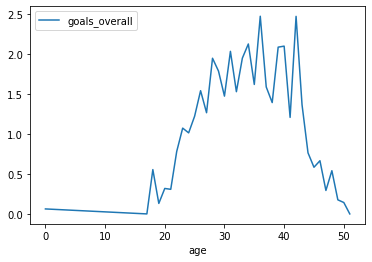

In [52]:
goals_age_all.plot( y="mean")

In [53]:
#### Age by position
#### Confirming that age isn't related to position

goals_age_all = pd.pivot_table(combined_df2, index="position", values= "age", aggfunc=["count","mean"])
goals_age_all

,count,mean
,age,age
position,,
Defender,2558,32.405786
Forward,1678,31.873063
Goalkeeper,852,34.610329
Midfielder,2912,31.236951
